In [1]:
from imutils.perspective import four_point_transform
from imutils import contours
import imutils
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
# from weight_prerequisite import detect_weight_region
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials


In [10]:
def detect_weight_region(image):
    top_left_corner = (21,120)
    bottom_right_corner = (217, 210)
    return (0,0,image.shape[0],image.shape[1] )

def digit_number(image):
    cv2.imwrite('capture.png', image)
    digit = ""
    with open("capture.png", mode ='rb') as captured_image:
        print("load digit image... and predict ")
        results = predictor.classify_image("c22b7174-dd80-457b-829e-4d05496aee33", "Iteration3", captured_image)
        maxm_percentage = 0.0
        for prediction in results.predictions:
            if(prediction.probability> maxm_percentage):
                digit = prediction.tag_name
                maxm_percentage = prediction.probability
#             print("\t" + prediction.tag_name +": {0:.2f}%".format(prediction.probability * 100))    
    return digit
def get_digits(collection_of_image):
#     digit_dict ={"Zero":0, "One":1, "Two":2, "Three":3, "Four":4, "Five":5, "Six":6, "Seven":7, "Eight":8, "Nine":9 }
#     no_of_digit =len(collection_of_image)
#     weight = 0
#     factor = 1
#     for i,image in enumerate(collection_of_image):
#         number = digit_number(image)
#         weight+=digit_dict[number]*factor
#         factor*=10
    
#     weight = weight*0.001
        
#     return weight
    return 0.252

In [11]:
def detect_weight(image):
    image = imutils.resize(image, height=500)
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    (x,y,w,h) = detect_weight_region(image)
    roi = image[y:y+h, x:x+w]
    roi = cv2.cvtColor(roi, cv2.COLOR_RGB2BGR)
    weight_image = roi.copy()
    hsv = cv2.cvtColor(weight_image, cv2.COLOR_BGR2HSV)
    lower_hsv = np.array([72, 68, 185])
    higher_hsv = np.array([126, 124, 255])
    # Apply the cv2.inrange method to create a mask
    mask = cv2.inRange(hsv, lower_hsv, higher_hsv)
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    digitCnts = []
    for c in cnts:
        # compute the bounding box of the contour
        (x, y, w, h) = cv2.boundingRect(c)
        # if the contour is sufficiently large, it must be a digit
        if w >= 15 :
            digitCnts.append((x,y,w,h))

    digitCnts = sorted(digitCnts)

    final_digit_contour = []
    i = 0
    while(i<len(digitCnts)-1):
        if(abs(digitCnts[i][0]- digitCnts[i+1][0])<10):
#             print("aaya")
            #matlab dono same portioan ke hai
            x1_1,y1_1,x1_2,y1_2 = digitCnts[i][0],digitCnts[i][1], digitCnts[i][0]+digitCnts[i][2], digitCnts[i][1]+digitCnts[i][3]
            x2_1,y2_1, x2_2,y2_2 = digitCnts[i+1][0],digitCnts[i+1][1], digitCnts[i+1][0]+digitCnts[i+1][2], digitCnts[i+1][1]+digitCnts[i+1][3]
            new_value = [min(x1_1,x2_1), min(y1_1,y2_1), max(x1_2,x2_2), max(y1_2,y2_2)]
    #         if(digitCnts[i][1]<digitCnts[i+1][1]):
    #             new_value = (min(digitCnts[i][0],digitCnts[i+1][0]), min(digitCnts[i][1],digitCnts[i+1][1], max(digitCnts[i][2],digitCnts[i+1] )
    #         else:
    #             new_value = (digitCnts[i][0], digitCnts[i+1][1], digitCnts[i][2], digitCnts[i][3]+digitCnts[i+1][3])
            new_value[2] = new_value[2] - new_value[0]
            new_value[3] = new_value[3] -  new_value[1]
            final_digit_contour.append(new_value)
#             print(i, final_digit_contour)
            i+=2
        else:
#             print("nahi aaya")
            final_digit_contour.append(digitCnts[i])
            print(i, final_digit_contour)
            if(i==len(digitCnts)-2):
                final_digit_contour.append(digitCnts[i+1])
                print(i,final_digit_contour)
            i+=1
            
    necessary_digit_region = []
    for (x,y,w,h ) in final_digit_contour:
        digit_region = roi[y:y+h, x:x+w]
        necessary_digit_region.append(digit_region)
        print(x,y,w,h)
        roi = cv2.rectangle(roi, (x,y), (x+w,y+h), (255, 0,0), 2)
        plt.imshow(roi)
        
    output = weight_image.copy()
    print(final_digit_contour)
#     plt.imshow(mask)
#     plt.imshow(necessary_digit_region[0])
    weight = get_digits(necessary_digit_region) 
    
    return weight

aaya
0 [[150, 200, 38, 96]]
nahi aaya
2 [[150, 200, 38, 96], (200, 200, 37, 97)]
nahi aaya
3 [[150, 200, 38, 96], (200, 200, 37, 97), (250, 203, 31, 97)]
3 [[150, 200, 38, 96], (200, 200, 37, 97), (250, 203, 31, 97), (294, 205, 37, 97)]
150 200 38 96
200 200 37 97
250 203 31 97
294 205 37 97
[[150, 200, 38, 96], (200, 200, 37, 97), (250, 203, 31, 97), (294, 205, 37, 97)]


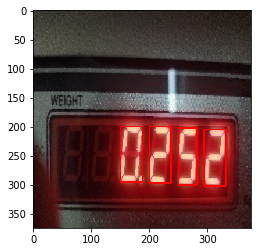

In [12]:
image = cv2.imread("weighing_scale.jpg")
weight = detect_weight(image)


In [1]:
print(weight)

NameError: name 'weight' is not defined

In [1]:
import cv2

camera = cv2.VideoCapture(0)
camera.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
camera.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
ret, image = camera.read()
if(ret == False):
    print("break")
print(type(image))


<class 'numpy.ndarray'>


In [2]:
print(image)

[[[240 223 219]
  [244 227 223]
  [245 226 222]
  ...
  [238 250 241]
  [236 249 238]
  [233 246 235]]

 [[241 224 220]
  [243 226 222]
  [246 224 221]
  ...
  [236 247 243]
  [236 248 240]
  [234 246 237]]

 [[241 224 220]
  [241 224 220]
  [243 224 220]
  ...
  [238 247 246]
  [240 248 244]
  [237 245 242]]

 ...

 [[ 93  90  91]
  [ 92  89  90]
  [ 92  89  90]
  ...
  [ 99 107 110]
  [102 104 111]
  [101 103 110]]

 [[ 93  90  92]
  [ 92  88  91]
  [ 94  91  94]
  ...
  [124 133 139]
  [121 131 136]
  [117 126 132]]

 [[ 92  88  91]
  [ 93  90  92]
  [ 95  89  92]
  ...
  [125 136 144]
  [126 132 140]
  [121 128 136]]]
